## 사용할 라이브러리

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_path = "../../data/Paddy/train_images/"

## 이미지 수

In [4]:
import pathlib
from glob import glob

image_count = len(list(pathlib.Path(train_path).glob('*/*.jpg')))
print(image_count)

10407


In [5]:
data = pd.read_csv('../../data/Paddy/train.csv')

## 불러온 데이터 살펴보기

In [6]:
data.head() # 처음 다섯개의 데이터

,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [7]:
data.tail() # 끝 다섯개의 데이터

,image_id,label,variety,age
10402,107607.jpg,tungro,Zonal,55
10403,107811.jpg,tungro,Zonal,55
10404,108547.jpg,tungro,Zonal,55
10405,110245.jpg,tungro,Zonal,55
10406,110381.jpg,tungro,Zonal,55


In [8]:
data.info() # 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image_id  10407 non-null  object
 1   label     10407 non-null  object
 2   variety   10407 non-null  object
 3   age       10407 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 325.3+ KB


* 이미지 식별 아이디
* 벼 질병의 대상군
* 벼 품종의 이름
* 벼의 나이 (일수)

In [9]:
data.describe() # int64인 age값 분석

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


* 10407개의 데이터
* 평균나이 64일
* 최소 45일
* 최대 82일

In [10]:
data.label.unique() # label의 값 = 벼 질병의 10가지 범주

array(['bacterial_leaf_blight', 'bacterial_leaf_streak',
       'bacterial_panicle_blight', 'blast', 'brown_spot', 'dead_heart',
       'downy_mildew', 'hispa', 'normal', 'tungro'], dtype=object)

In [11]:
data.label.value_counts() # 각각의 범주의 갯수

normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: label, dtype: int64

## 시각화

### 벼 질병 10가지 범주의 수치

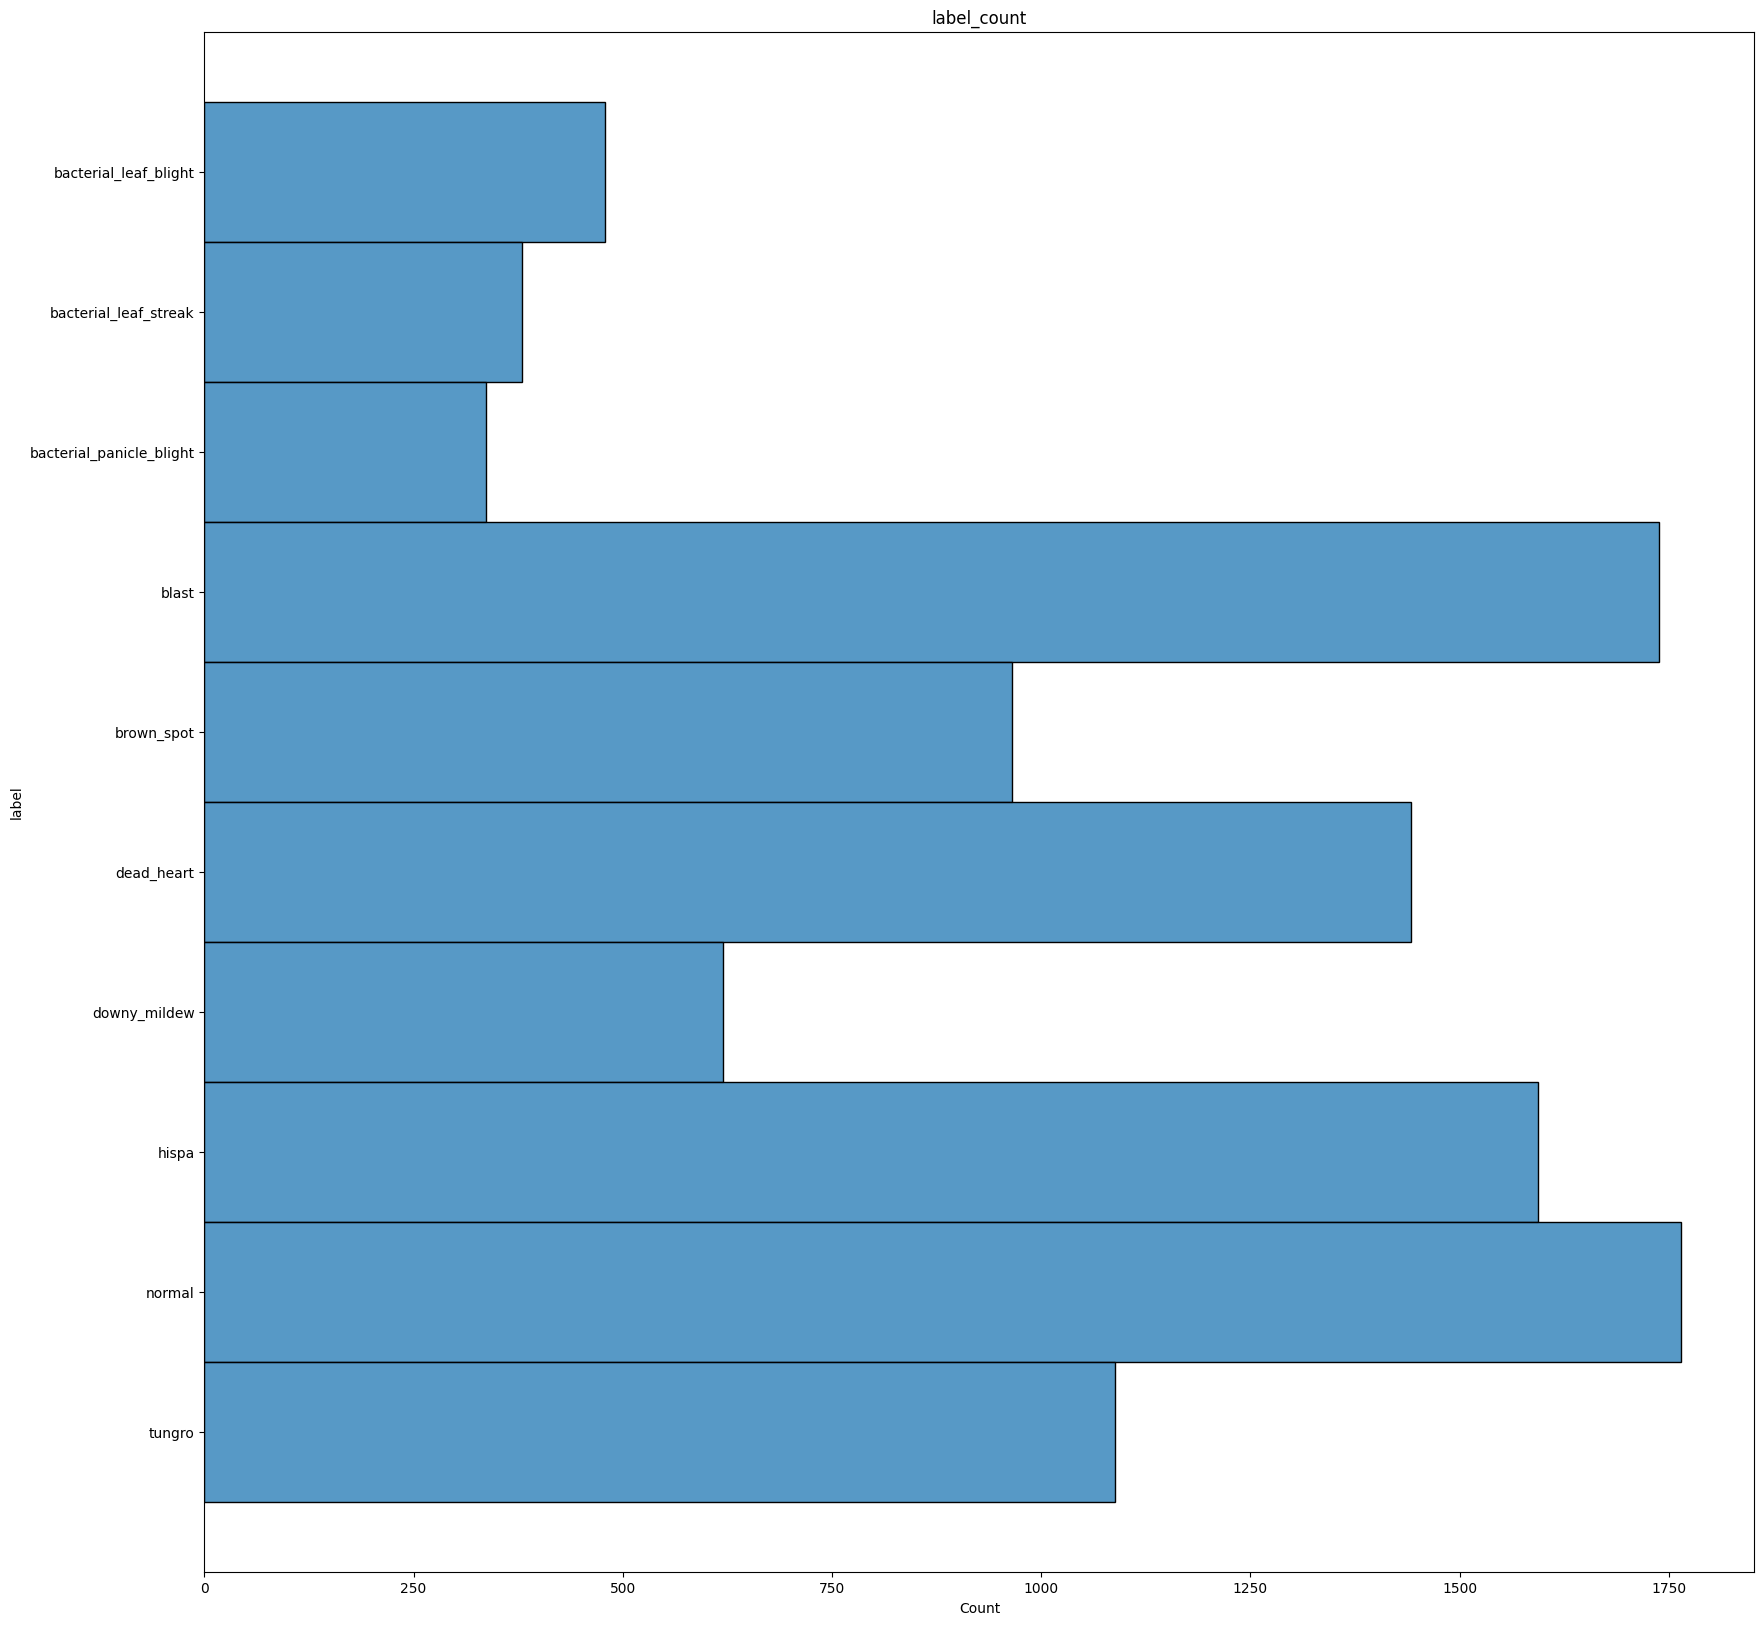

In [12]:
fig,axes = plt.subplots(1,1,figsize = (20,20))
sns.histplot(data, y='label')
plt.title("label_count")
plt.show()

### 벼 품종

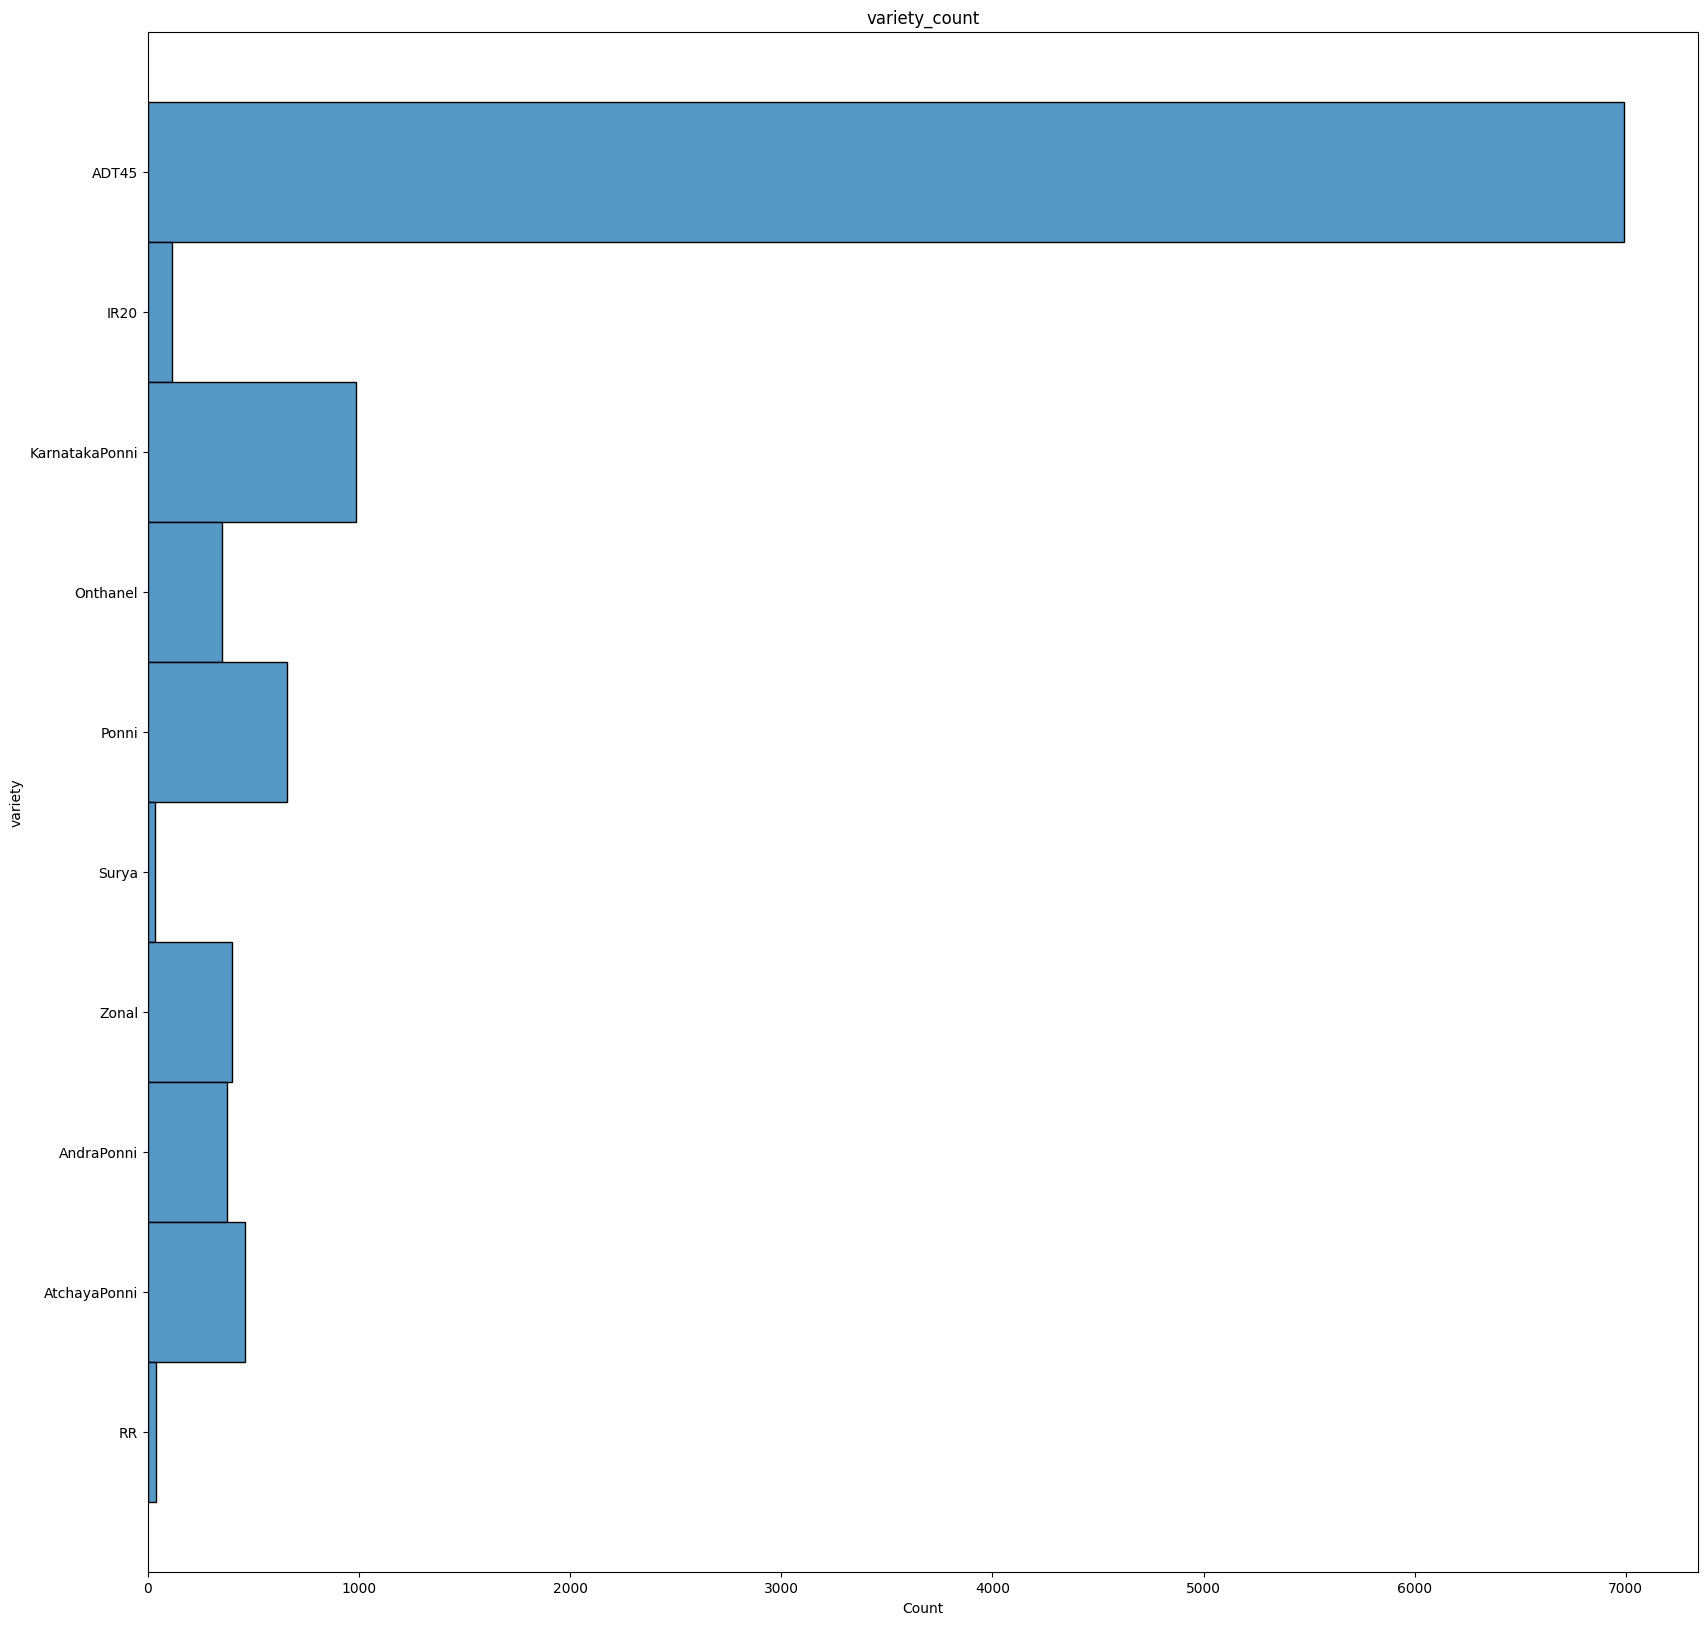

In [13]:
fig,axes = plt.subplots(1,1,figsize = (20,20))
sns.histplot(data, y='variety')
plt.title("variety_count")
plt.show()

### 벼 나이

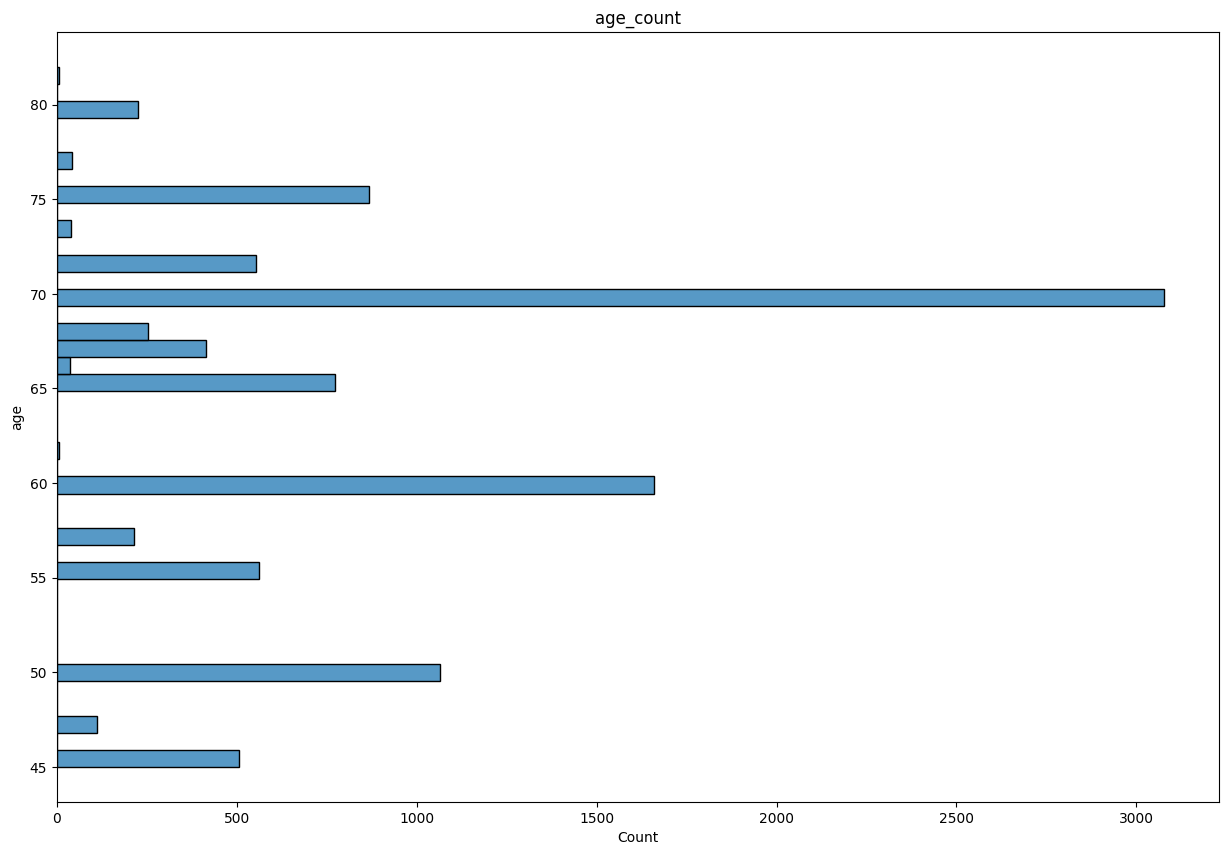

In [14]:
fig,axes = plt.subplots(1,1,figsize = (15,10))
sns.histplot(data, y='age')
plt.title("age_count")
plt.show()

### 벼 질병 이미지 확인

In [15]:
img = {'../../data/Paddy/train_images/normal/100002.jpg',
    '../../data/Paddy/train_images/blast/100004.jpg',
    '../../data/Paddy/train_images/brown_spot/100001.jpg',
    '../../data/Paddy/train_images/dead_heart/100008.jpg',
    '../../data/Paddy/train_images/downy_mildew/100017.jpg',
    '../../data/Paddy/train_images/hispa/100003.jpg',
    '../../data/Paddy/train_images/tungro/100011.jpg',
    '../../data/Paddy/train_images/bacterial_leaf_blight/100023.jpg',
    '../../data/Paddy/train_images/bacterial_leaf_streak/100042.jpg',
    '../../data/Paddy/train_images/bacterial_panicle_blight/100043.jpg'}


name = ['normal','blast','brown_spot','dead_heart','downy_mildew','hispa','tungro','bacterial_leaf_blight','bacterial_leaf_streak','bacterial_panicle_blight']

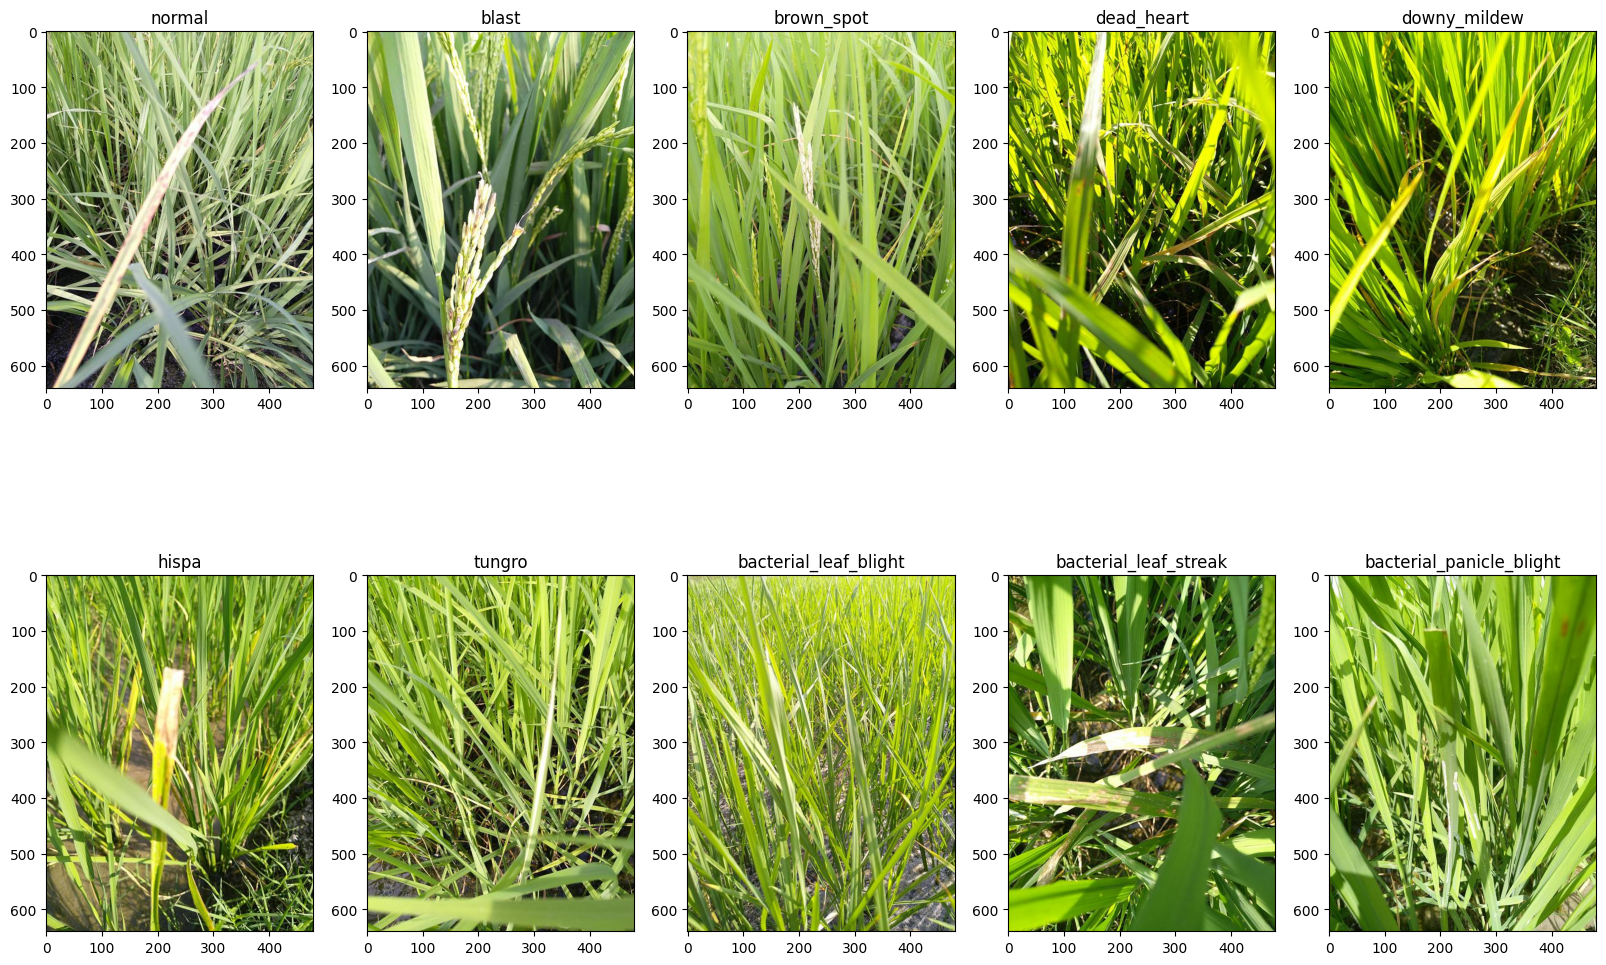

In [16]:
plt.figure(figsize=(20,20))
columns = 5
for i, image in enumerate(img):
    plt.subplot(len(img)//columns + 1, columns, i + 1)
    image=plt.imread(image)
    plt.title(name[i])
    plt.imshow(image)